# LSTM Deep Learning Bitcoin Trading Model 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import datetime
import binance

%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [3]:
from datetime import datetime

In [4]:
from binance.client import Client 

api_key = 'insert your key'
api_secret = 'insert your secret key'

client = Client(api_key, api_secret)

In [5]:
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)

In [6]:
len(candles)

500

In [7]:
candles[499] #time-open-high-low-close-volume-close_time

[1621798260000,
 '33050.82000000',
 '33173.84000000',
 '33018.72000000',
 '33091.74000000',
 '113.81694900',
 1621798319999,
 '3766155.02452823',
 2228,
 '58.49765100',
 '1936123.49307717',
 '0']

In [8]:
candles

[[1621768320000,
  '35255.01000000',
  '35367.68000000',
  '35233.71000000',
  '35356.07000000',
  '77.83274800',
  1621768379999,
  '2748520.30194169',
  1310,
  '43.73645800',
  '1544296.04510158',
  '0'],
 [1621768380000,
  '35358.12000000',
  '35358.12000000',
  '35269.15000000',
  '35293.54000000',
  '55.76639200',
  1621768439999,
  '1968777.44288299',
  1294,
  '23.37464500',
  '825202.88879975',
  '0'],
 [1621768440000,
  '35295.32000000',
  '35298.33000000',
  '35158.17000000',
  '35158.53000000',
  '60.58950900',
  1621768499999,
  '2135021.25437784',
  1609,
  '19.98578300',
  '704291.66895581',
  '0'],
 [1621768500000,
  '35160.14000000',
  '35163.59000000',
  '35005.34000000',
  '35018.14000000',
  '159.37745600',
  1621768559999,
  '5587902.99289809',
  2408,
  '76.42805400',
  '2679049.34724698',
  '0'],
 [1621768560000,
  '35023.21000000',
  '35026.54000000',
  '34600.00000000',
  '34752.48000000',
  '624.60435000',
  1621768619999,
  '21763329.11683087',
  7861,
  '258

In [9]:
price = np.array([float(candles[i][4]) for i in range(500)])

In [10]:
time = np.array([int(candles[i][0]) for i in range(500)])

t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

In [11]:
t

array(['14:12:00', '14:13:00', '14:14:00', '14:15:00', '14:16:00',
       '14:17:00', '14:18:00', '14:19:00', '14:20:00', '14:21:00',
       '14:22:00', '14:23:00', '14:24:00', '14:25:00', '14:26:00',
       '14:27:00', '14:28:00', '14:29:00', '14:30:00', '14:31:00',
       '14:32:00', '14:33:00', '14:34:00', '14:35:00', '14:36:00',
       '14:37:00', '14:38:00', '14:39:00', '14:40:00', '14:41:00',
       '14:42:00', '14:43:00', '14:44:00', '14:45:00', '14:46:00',
       '14:47:00', '14:48:00', '14:49:00', '14:50:00', '14:51:00',
       '14:52:00', '14:53:00', '14:54:00', '14:55:00', '14:56:00',
       '14:57:00', '14:58:00', '14:59:00', '15:00:00', '15:01:00',
       '15:02:00', '15:03:00', '15:04:00', '15:05:00', '15:06:00',
       '15:07:00', '15:08:00', '15:09:00', '15:10:00', '15:11:00',
       '15:12:00', '15:13:00', '15:14:00', '15:15:00', '15:16:00',
       '15:17:00', '15:18:00', '15:19:00', '15:20:00', '15:21:00',
       '15:22:00', '15:23:00', '15:24:00', '15:25:00', '15:26:

In [12]:
price.shape

(500,)

In [13]:
price

array([35356.07, 35293.54, 35158.53, 35018.14, 34752.48, 34745.68,
       34817.47, 34848.64, 34862.  , 34928.71, 35066.89, 35022.41,
       35269.82, 35666.84, 35569.89, 35462.33, 35481.76, 35472.97,
       35379.24, 35298.6 , 35372.71, 35340.32, 35287.24, 35387.59,
       35529.99, 35541.73, 35523.2 , 35644.6 , 35659.85, 35527.45,
       35469.84, 35625.69, 35662.41, 35592.26, 35731.78, 35702.56,
       35589.4 , 35529.6 , 35419.23, 35471.41, 35412.12, 35419.86,
       35433.89, 35400.01, 35427.13, 35463.25, 35486.08, 35389.1 ,
       35320.78, 35727.13, 35543.19, 35287.19, 35096.68, 34949.67,
       35119.21, 35112.48, 35111.06, 35172.54, 35254.48, 35232.36,
       35262.17, 35313.65, 35340.45, 35510.14, 35498.96, 35429.87,
       35504.8 , 35617.33, 35465.25, 35350.48, 35237.09, 35165.72,
       35151.84, 35208.87, 35250.05, 35062.58, 34987.5 , 35031.  ,
       35186.24, 35186.58, 35199.99, 35182.85, 35154.91, 34820.43,
       34638.92, 34468.47, 34460.39, 34423.66, 34354.61, 34270

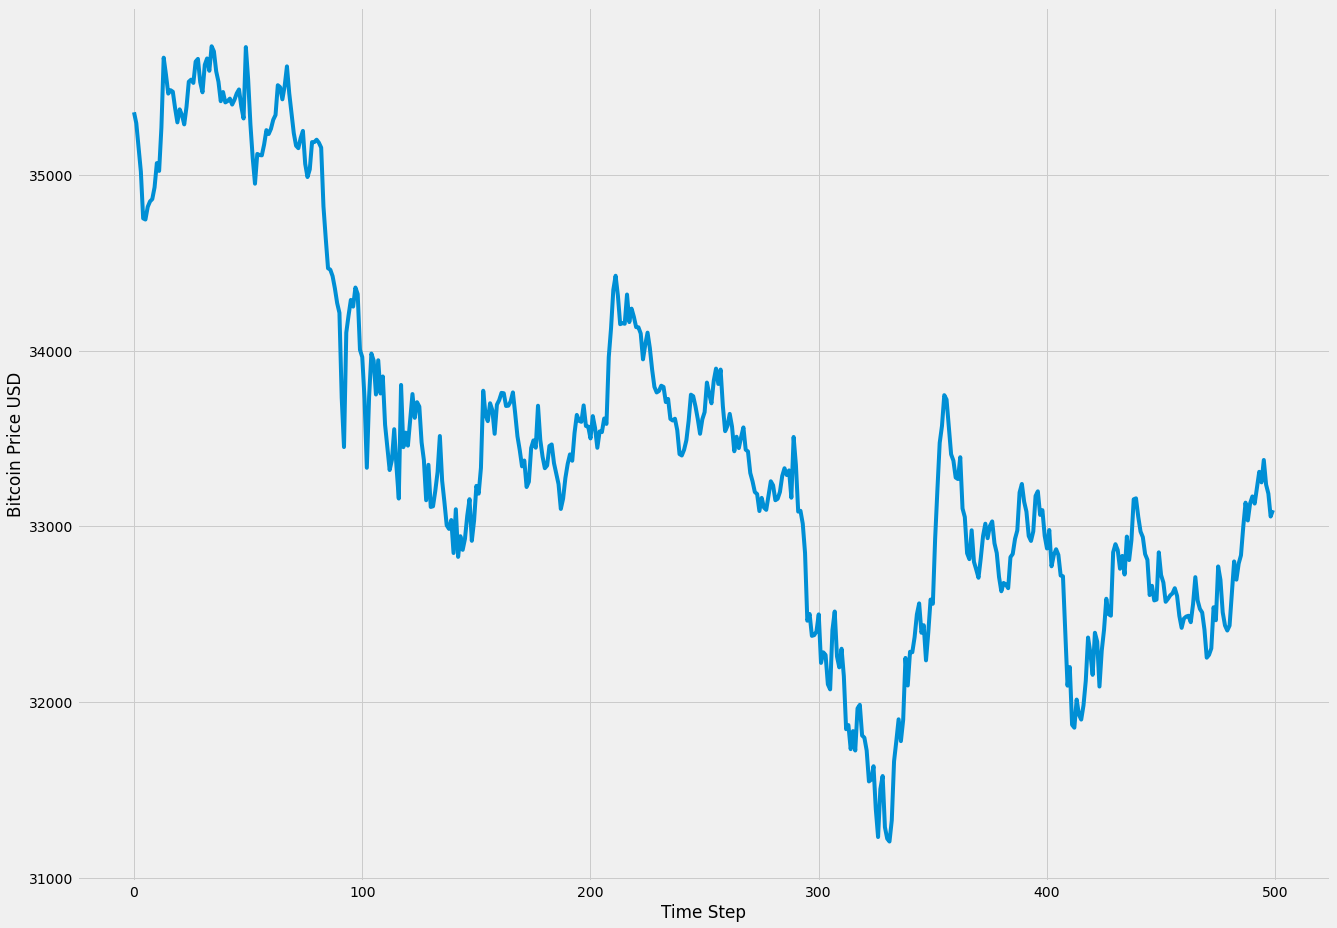

In [14]:
plt.figure(figsize=(20,15));
plt.xlabel('Time Step');
plt.ylabel('Bitcoin Price USD')
plt.plot(price);

In [15]:
timeframe = pd.DataFrame({'Time':t,'Price $':price})

timeframe

,Time,Price $
0,14:12:00,35356.07
1,14:13:00,35293.54
2,14:14:00,35158.53
3,14:15:00,35018.14
4,14:16:00,34752.48
...,...,...
495,22:27:00,33377.34
496,22:28:00,33237.38
497,22:29:00,33186.09
498,22:30:00,33055.58


In [16]:
price = price.reshape(500,1)

price

array([[35356.07],
       [35293.54],
       [35158.53],
       [35018.14],
       [34752.48],
       [34745.68],
       [34817.47],
       [34848.64],
       [34862.  ],
       [34928.71],
       [35066.89],
       [35022.41],
       [35269.82],
       [35666.84],
       [35569.89],
       [35462.33],
       [35481.76],
       [35472.97],
       [35379.24],
       [35298.6 ],
       [35372.71],
       [35340.32],
       [35287.24],
       [35387.59],
       [35529.99],
       [35541.73],
       [35523.2 ],
       [35644.6 ],
       [35659.85],
       [35527.45],
       [35469.84],
       [35625.69],
       [35662.41],
       [35592.26],
       [35731.78],
       [35702.56],
       [35589.4 ],
       [35529.6 ],
       [35419.23],
       [35471.41],
       [35412.12],
       [35419.86],
       [35433.89],
       [35400.01],
       [35427.13],
       [35463.25],
       [35486.08],
       [35389.1 ],
       [35320.78],
       [35727.13],
       [35543.19],
       [35287.19],
       [3509

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
scaler.fit(price[:374])

StandardScaler()

In [19]:
price = scaler.transform(price)

In [20]:
df = pd.DataFrame(price.reshape(100,5),columns=['First','Second','Third','Fourth','Target'])

In [22]:
df.head()

,First,Second,Third,Fourth,Target
0,1.531576,1.473413,1.347834,1.217250,0.970145
1,0.963820,1.030596,1.059589,1.072016,1.134066
2,1.262594,1.221221,1.451350,1.820639,1.730461
3,1.630414,1.648487,1.640311,1.553127,1.478120
4,1.547054,1.516926,1.467553,1.560894,1.693348


### Train Test Split 

In [23]:
#75% train, 25% test

x_train = df.iloc[:74,:4]
y_train = df.iloc[:74,-1]

x_test = df.iloc[75:99,:4]
y_test = df.iloc[75:99,-1]

In [24]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train

array([[[ 1.53157582e+00],
        [ 1.47341341e+00],
        [ 1.34783357e+00],
        [ 1.21724951e+00]],

       [[ 9.63820258e-01],
        [ 1.03059588e+00],
        [ 1.05958872e+00],
        [ 1.07201555e+00]],

       [[ 1.26259442e+00],
        [ 1.22122126e+00],
        [ 1.45135020e+00],
        [ 1.82063920e+00]],

       [[ 1.63041378e+00],
        [ 1.64848664e+00],
        [ 1.64031060e+00],
        [ 1.55312744e+00]],

       [[ 1.54705355e+00],
        [ 1.51692592e+00],
        [ 1.46755345e+00],
        [ 1.56089421e+00]],

       [[ 1.70426786e+00],
        [ 1.68703214e+00],
        [ 1.79995261e+00],
        [ 1.81413743e+00]],

       [[ 1.63739923e+00],
        [ 1.78236344e+00],
        [ 1.81651862e+00],
        [ 1.75126845e+00]],

       [[ 1.85386423e+00],
        [ 1.74860822e+00],
        [ 1.69298512e+00],
        [ 1.59032423e+00]],

       [[ 1.58371085e+00],
        [ 1.59091022e+00],
        [ 1.60396026e+00],
        [ 1.57244670e+00]],

       [[ 

In [26]:
x_train.shape , x_test.shape

((74, 4, 1), (24, 4, 1))

In [27]:
model = Sequential()

model.add(LSTM(20, return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 20)             1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, batch_size=5,epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8056
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3784
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 13/100
15/15 [=================

In [33]:
y_pred = model.predict(x_test)

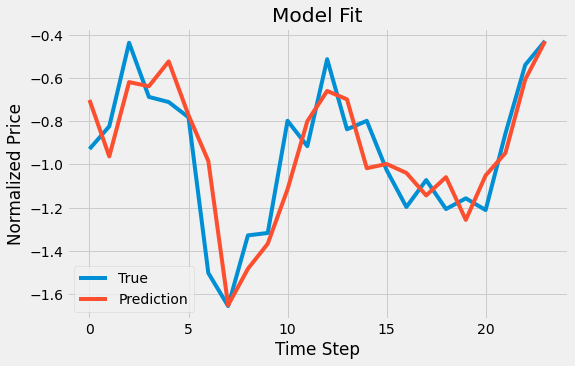

In [34]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

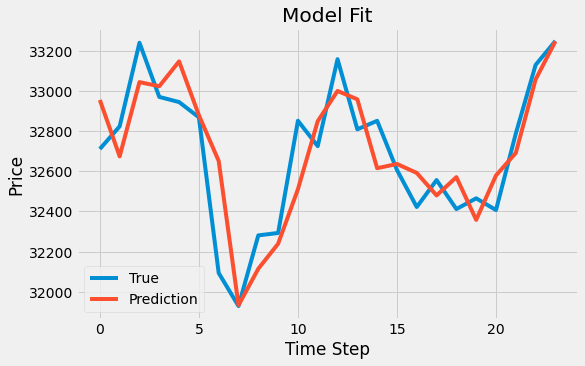

In [35]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')
plt.legend()

In [36]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(y_pred)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 189.26 RMSE


In [37]:
from sklearn.metrics import r2_score

In [38]:
print('RSquared :','{:.2%}'.format(r2_score(y_test,y_pred)))

RSquared : 70.05%


In [39]:
model.save("Bitcoin_model.h5")